In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

In [3]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()
# 50000 tiny training images each class contain 6000 images
# 10000 test images(total 80 million images)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0

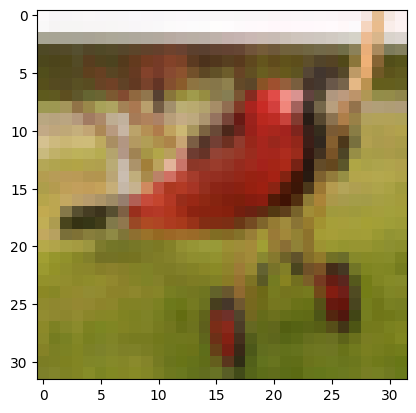

In [6]:
plt.imshow(X_train[35])

In [7]:
y_train[35]

array([0], dtype=uint8)

In [9]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(700, activation="relu"),
    BatchNormalization(),
    Dense(500, activation="relu"),
    BatchNormalization(),
    Dense(250, activation="relu"),
    BatchNormalization(),
    Dense(120, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax"),
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 57ms/step - accuracy: 0.3221 - loss: 1.9122 - val_accuracy: 0.3740 - val_loss: 1.7646
Epoch 2/20
 912/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.4141 - loss: 1.6327

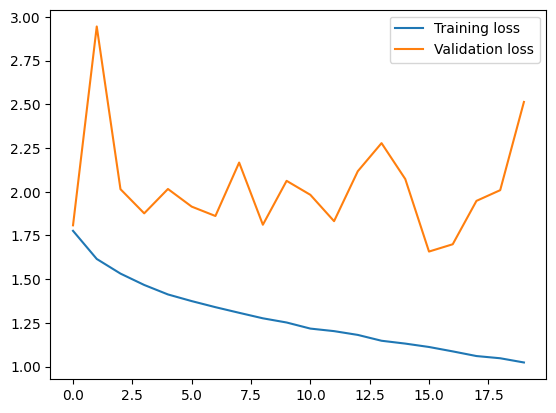

In [12]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()
plt.show()

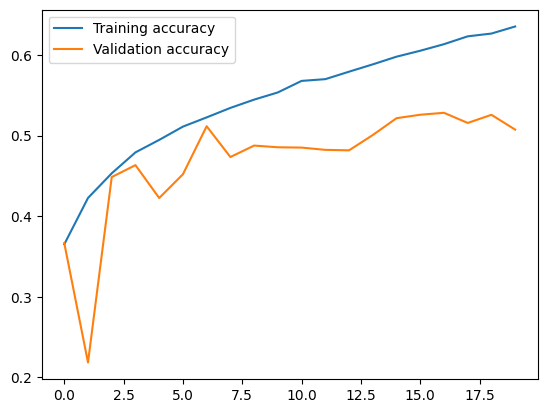

In [13]:
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()

In [36]:
from PIL import Image
img = Image.open(r"C:\Users\HP\Desktop\Data Analytics\Artificial Intelligence\ship.jpeg")
img = img.resize((32,32))
img = np.array(img)

In [37]:
img.ravel()

array([141, 177, 227, ...,  93, 138, 194], dtype=uint8)

In [38]:
pred = model.predict(np.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


In [39]:
np.argmax(pred)

8

In [40]:
from PIL import Image
img = Image.open(r"C:\Users\HP\Desktop\Data Analytics\Artificial Intelligence\car.jpg")
img = img.resize((32,32))
img = np.array(img)

In [41]:
img.ravel()

array([193, 195, 199, ..., 195, 197, 199], dtype=uint8)

In [42]:
pred = model.predict(np.expand_dims(img, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [43]:
np.argmax(pred)

9